In [5]:
import matplotlib.pyplot as plotter
from transformations import normalize_dataset, standardize_dataset, box_cox, yeo_johnson
from pandas import DataFrame, read_csv
from scipy.stats import pearsonr

In [6]:
# Initialize Variables

# Plotting variables
size = 1000
plot_hist_color = 'cyan'
plot_hist_alpha = 0.63

# Problem Specific Variables
output_key = 'OUTPUT'
milage_key = 'MIL'
year_key = 'YEAR'
fuel_consumption_key = 'FCON'
condition_key = 'COND'

# Data Path
file_path = "data/carprices.csv"

In [7]:
chosen_key = fuel_consumption_key

In [8]:
# Load and Present Dataset

# Load
df_raw = read_csv(file_path)

# Show
df_raw.head()

,Unnamed: 0,YEAR,MIL,FCON,COND,OUTPUT
0,0,2014,32761,9.414131,75,8.325274e+05
1,1,2022,12591,9.037609,68,1.286959e+06
2,2,2020,23300,7.954067,52,1.027923e+06
3,3,2017,21919,8.320422,69,8.884143e+05
4,4,2006,25489,9.137466,85,8.220387e+05


In [9]:
# Stats, Raw Data

print("Average: " + str(df_raw[chosen_key].sum() / len(df_raw[chosen_key])))
print("Min: " + str(df_raw[chosen_key].min()))
print("Max: " + str(df_raw[chosen_key].max()))

Average: 9.964231000931978
Min: 4.0
Max: 25.0


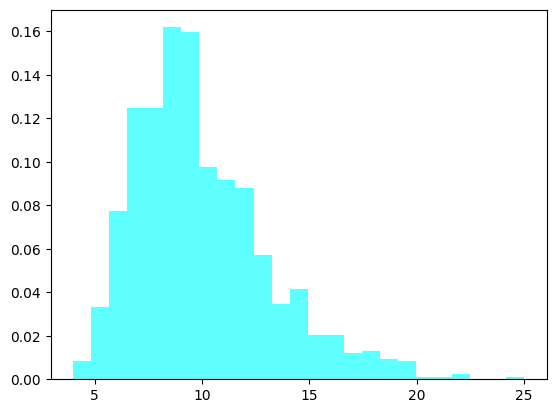

In [10]:
# Plot Raw Data Distribution

plotter.hist(df_raw[chosen_key], 
             25, 
             density=True, 
             color=plot_hist_color, 
             alpha=plot_hist_alpha);

In [11]:
# Normalize Dataset

df_norm = normalize_dataset(df_raw, 
                            all_pos=True)

In [12]:
# Show Normalized Data

df_norm.head()

,Unnamed: 0,YEAR,MIL,FCON,COND,OUTPUT
0,0.000001,0.705883,0.131045,0.257817,0.642858,0.306534
1,0.001002,0.941177,0.050365,0.239887,0.542858,0.575740
2,0.002003,0.882354,0.093201,0.188290,0.314287,0.422287
3,0.003004,0.794119,0.087677,0.205735,0.557144,0.339641
4,0.004005,0.470589,0.101957,0.244642,0.785715,0.300320


In [13]:
# Stats, Normalized Data

print("Average: " + str(df_norm[chosen_key].sum() / len(df_norm[chosen_key])))
print("Min: " + str(df_norm[chosen_key].min()))
print("Max: " + str(df_norm[chosen_key].max()))

Average: 0.2840120135687138
Min: 1e-06
Max: 1.00000104761905


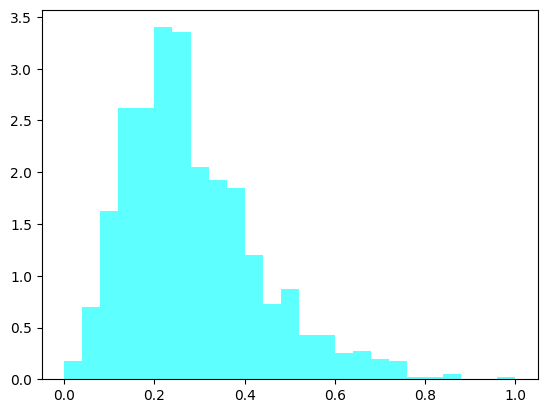

In [14]:
# Plot Normalized Data Distribution

plotter.hist(df_norm[chosen_key], 
             25, 
             density=True, 
             color=plot_hist_color, 
             alpha=plot_hist_alpha);

In [15]:
# Standardize Dataset

df_stan = standardize_dataset(df_raw)

In [16]:
# Show Standardized Data

df_stan.head()

,Unnamed: 0,YEAR,MIL,FCON,COND,OUTPUT
0,-1.730320,0.054467,-0.687937,-0.175892,0.152710,0.323254
1,-1.726856,1.455557,-1.279418,-0.296283,-0.422315,2.468333
2,-1.723391,1.105285,-0.965379,-0.642741,-1.736659,1.245593
3,-1.719927,0.579876,-1.005876,-0.525601,-0.340169,0.587060
4,-1.716463,-1.346623,-0.901187,-0.264355,0.974175,0.273743


In [17]:
# Stats, Standardized Data

print("Average: " + str(df_stan[chosen_key].sum() / len(df_stan[chosen_key])))
print("Min: " + str(df_stan[chosen_key].min()))
print("Max: " + str(df_stan[chosen_key].max()))

Average: -4.583000645652646e-16
Min: -1.9070367014404146
Max: 4.807621185551352


In [18]:
# ADDED TO DELETE

for col in df_stan.columns:
    print("Stats of: " + str(col))
    print("Average: " + str(df_stan[col].sum() / len(df_stan[chosen_key])))
    print("Min: " + str(df_stan[col].min()))
    print("Max: " + str(df_stan[col].max()))

Stats of: Unnamed: 0
Average: 0.0
Min: -1.7303196219213355
Max: 1.7303196219213355
Stats of: YEAR
Average: -1.3709922086491133e-14
Min: -4.148802375692317
Max: 1.8058297646909123
Stats of: MIL
Average: 5.3290705182007515e-18
Min: -1.6486456380559542
Max: 5.682543738479153
Stats of: FCON
Average: -4.583000645652646e-16
Min: -1.9070367014404146
Max: 4.807621185551352
Stats of: COND
Average: -4.3431924723336123e-16
Min: -3.5438809081753684
Max: 2.2063720663100574
Stats of: OUTPUT
Average: 2.255973186038318e-16
Min: -2.1192452027226145
Max: 5.848911224642409


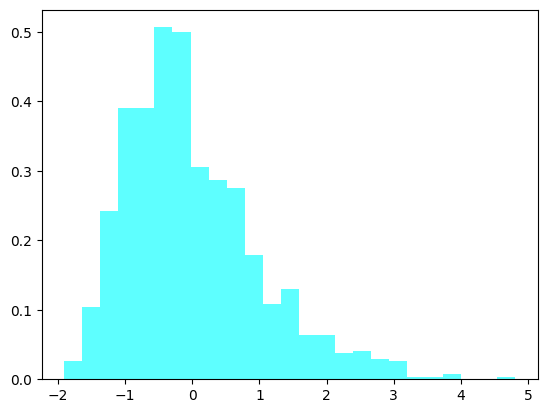

In [19]:
# Plot Standardized Data Distribution

plotter.hist(df_stan[chosen_key], 
             25, 
             density=True, 
             color=plot_hist_color, 
             alpha=plot_hist_alpha);

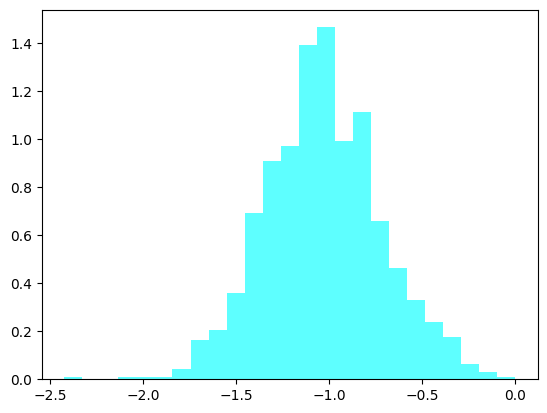

In [20]:
# Box Cox, Raw out

df_bc_raw = DataFrame(box_cox(DataFrame(df_norm[chosen_key], 
                                        columns=[chosen_key])), 
                      columns=[chosen_key])

plotter.hist(df_bc_raw[chosen_key], 
             25, 
             density=True, 
             color=plot_hist_color, 
             alpha=plot_hist_alpha);

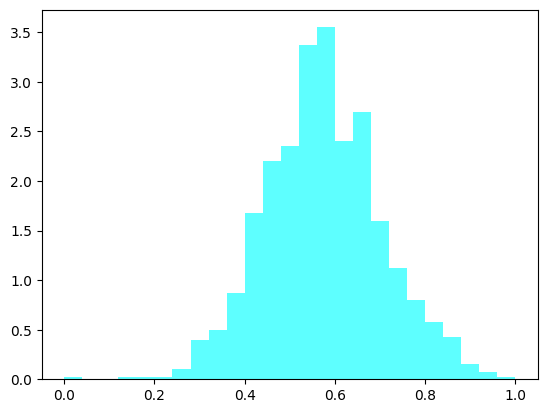

In [21]:
# Box Cox, Normalize After

df_bc_norm = DataFrame(box_cox(DataFrame(df_norm[chosen_key], columns=[chosen_key]), normalize=True), columns=[chosen_key])

plotter.hist(df_bc_norm[chosen_key], 
             25, 
             density=True, 
             color=plot_hist_color, 
             alpha=plot_hist_alpha);

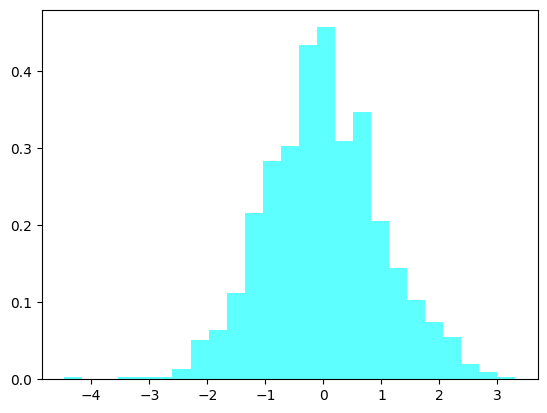

In [22]:
# Box Cox, Standardize After

df_bc_stan = DataFrame(box_cox(DataFrame(df_norm[chosen_key], 
                                         columns=[chosen_key]), 
                               standardize=True), 
                       columns=[chosen_key])

plotter.hist(df_bc_stan[chosen_key], 
             25, 
             density=True, 
             color=plot_hist_color, 
             alpha=plot_hist_alpha);

In [23]:
# Box Cox Data Inspection

df_temp = DataFrame({'raw': df_raw[chosen_key],
                     'norm': df_norm[chosen_key],
                     'bc_raw': df_bc_raw[chosen_key],
                     'bc_norm': df_bc_norm[chosen_key],
                     'bc_stan': df_bc_stan[chosen_key]})

df_temp.head()

,raw,norm,bc_raw,bc_norm,bc_stan
0,9.414131,0.257817,-1.039113,0.571209,-0.026086
1,9.037609,0.239887,-1.079785,0.554426,-0.156494
2,7.954067,0.188290,-1.207939,0.501543,-0.567394
3,8.320422,0.205735,-1.162526,0.520283,-0.421785
4,9.137466,0.244642,-1.068829,0.558947,-0.121365


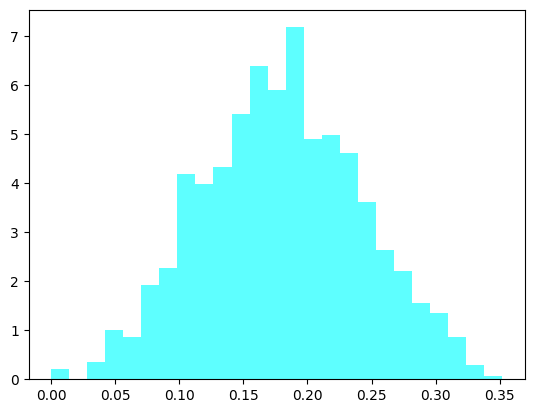

In [24]:
# Yeo Johnson, Raw

df_yj_raw = DataFrame(yeo_johnson(DataFrame(df_norm[chosen_key], 
                                            columns=[chosen_key])), 
                      columns=[chosen_key])

plotter.hist(df_yj_raw[chosen_key], 
             25, 
             density=True, 
             color=plot_hist_color, 
             alpha=plot_hist_alpha);

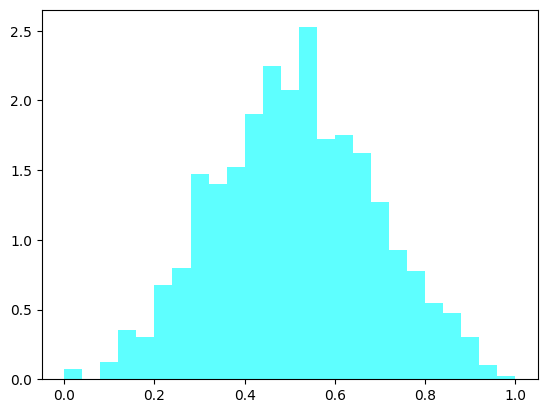

In [25]:
df_yj_norm = DataFrame(yeo_johnson(DataFrame(df_norm[chosen_key], columns=[chosen_key]), normalize=True), columns=[chosen_key])

plotter.hist(df_yj_norm[chosen_key], 
             25, 
             density=True, 
             color=plot_hist_color, 
             alpha=plot_hist_alpha);

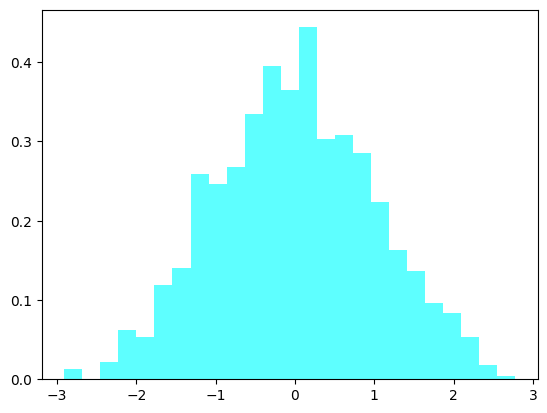

In [26]:
df_yj_stan = DataFrame(yeo_johnson(DataFrame(df_norm[chosen_key], columns=[chosen_key]), standardize=True), columns=[chosen_key])

plotter.hist(df_yj_stan[chosen_key], 
             25, 
             density=True, 
             color=plot_hist_color, 
             alpha=plot_hist_alpha);

In [27]:
# Yeo Johnson Inspection

df_temp = DataFrame({'raw': df_raw[chosen_key],
                     'norm': df_norm[chosen_key],
                     'bc_raw': df_bc_raw[chosen_key],
                     'bc_norm': df_bc_norm[chosen_key],
                     'bc_stan': df_bc_stan[chosen_key],
                     'yj_raw': df_yj_raw[chosen_key],
                     'yj_norm': df_yj_norm[chosen_key],
                     'yj_stan': df_yj_stan[chosen_key]})

df_temp.head()

,raw,norm,bc_raw,bc_norm,bc_stan,yj_raw,yj_norm,yj_stan
0,9.414131,0.257817,-1.039113,0.571209,-0.026086,0.179343,0.509781,-0.010929
1,9.037609,0.239887,-1.079785,0.554426,-0.156494,0.170618,0.484979,-0.151984
2,7.954067,0.188290,-1.207939,0.501543,-0.567394,0.143076,0.406691,-0.597214
3,8.320422,0.205735,-1.162526,0.520283,-0.421785,0.152817,0.434379,-0.439749
4,9.137466,0.244642,-1.068829,0.558947,-0.121365,0.172972,0.491669,-0.113933


In [28]:
print("Correlation (RAW): " + str(pearsonr(df_raw[chosen_key], df_raw[output_key])[0]))
print("Correlation (Norm): " + str(pearsonr(df_norm[chosen_key], df_norm[output_key])[0]))
print("Correlation (Stan): " + str(pearsonr(df_stan[chosen_key], df_stan[output_key])[0]))
print("Box Cox Transformation (RAW)" + str(str(pearsonr(df_bc_raw[chosen_key], df_norm[output_key])[0])))
print("Box Cox Transformation (Norm)" + str(str(pearsonr(df_bc_norm[chosen_key], df_norm[output_key])[0])))
print("Box Cox Transformation (Stan)" + str(str(pearsonr(df_bc_stan[chosen_key], df_norm[output_key])[0])))
print("Yeo Johnson Transformation (RAW)" + str(str(pearsonr(df_yj_raw[chosen_key], df_norm[output_key])[0])))
print("Yeo Johnson Transformation (Norm)" + str(str(pearsonr(df_yj_norm[chosen_key], df_norm[output_key])[0])))
print("Yeo Johnson Transformation (Stan)" + str(str(pearsonr(df_yj_stan[chosen_key], df_norm[output_key])[0])))

Correlation (RAW): 0.08641683255439643
Correlation (Norm): 0.08641683255439642
Correlation (Stan): 0.08641683255439642
Box Cox Transformation (RAW)0.0984766775601495
Box Cox Transformation (Norm)0.09847667756014952
Box Cox Transformation (Stan)0.09847667756014954
Yeo Johnson Transformation (RAW)0.10013603332059161
Yeo Johnson Transformation (Norm)0.1001360333205916
Yeo Johnson Transformation (Stan)0.10013603332059157
